# **Importing Libraries**

In [44]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install yfinance
#!pip install quantstats

import yfinance as yf
import datetime as dt
import quantstats as qs
from statsmodels.tsa.stattools import coint

import warnings
warnings.filterwarnings('ignore')

In [45]:
#!pip install --upgrade yfinance

# **Importing Dataset**

In [46]:
tickers_list = ['ADANIGREEN.NS', 'HDFCBANK.NS', 'IGL.NS', 'IOC.NS', 'MOTHERSUMI.NS', 'SHREECEM.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'ADANIPORTS.NS',
                'AMBUJACEM.NS', 'DABUR.NS', 'GODREJCP.NS', 'PGHH.NS', 'ULTRACEMCO.NS', 'YESBANK.NS', 'BHARTIARTL.NS', 'HEROMOTOCO.NS', 'HINDUNILVR.NS',
                'ICICIGI.NS', 'NAUKRI.NS', 'PEL.NS', 'SIEMENS.NS', 'ACC.NS', 'GRASIM.NS', 'HAVELLS.NS', 'TATASTEEL.NS', 'UPL.NS', 'AUROPHARMA.NS',
                'AXISBANK.NS', 'HDFC.NS', 'LT.NS', 'MARICO.NS', 'POWERGRID.NS', 'SBIN.NS', 'WIPRO.NS', 'APOLLOHOSP.NS', 'INDUSINDBK.NS', 'INFY.NS',
                'MRF.NS', 'ONGC.NS', 'ALKEM.NS', 'BANDHANBNK.NS', 'NMDC.NS', 'BAJAJFINSV.NS', 'CIPLA.NS', 'KOTAKBANK.NS', 'LTI.NS', 'MARUTI.NS',
                'PNB.NS', 'TCS.NS', 'TITAN.NS', 'ADANIENT.NS', 'BPCL.NS', 'BRITANNIA.NS', 'COLPAL.NS', 'EICHERMOT.NS', 'HDFCAMC.NS', 'HINDPETRO.NS',
                'ICICIPRULI.NS', 'DLF.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'CADILAHC.NS', 'JUBLFOOD.NS', 'NESTLEIND.NS',
                'BAJFINANCE.NS', 'BOSCHLTD.NS', 'INDIGO.NS', 'SBICARD.NS', 'UBL.NS', 'ABBOTINDIA.NS', 'BAJAJHLDNG.NS', 'COALINDIA.NS', 'HCLTECH.NS',
                'HDFCLIFE.NS', 'HINDALCO.NS', 'PIDILITIND.NS', 'ADANITRANS.NS', 'DRREDDY.NS', 'GAIL.NS', 'MCDOWELL-N.NS', 'BERGEPAINT.NS', 'DIVISLAB.NS',
                'DMART.NS', 'NTPC.NS', 'TECHM.NS', 'TORNTPHARM.NS', 'VEDL.NS', 'BIOCON.NS', 'INDUSTOWER.NS', 'ITC.NS', 'JSWSTEEL.NS', 'LUPIN.NS', 'M&M.NS',
                'MUTHOOTFIN.NS', 'PETRONET.NS', 'SBILIFE.NS', 'SUNPHARMA.NS']

In [47]:
data = yf.download(tickers_list,start='2017-06-01',end='2020-06-01',interval='1d')

[*********************100%***********************]  100 of 100 completed
ERROR:yfinance:
6 Failed downloads:
ERROR:yfinance:['ADANITRANS.NS', 'CADILAHC.NS', 'MOTHERSUMI.NS', 'MCDOWELL-N.NS', 'LTI.NS', 'HDFC.NS']: YFTzMissingError('possibly delisted; no timezone found')


# **Data Preprocessing**

<Axes: >

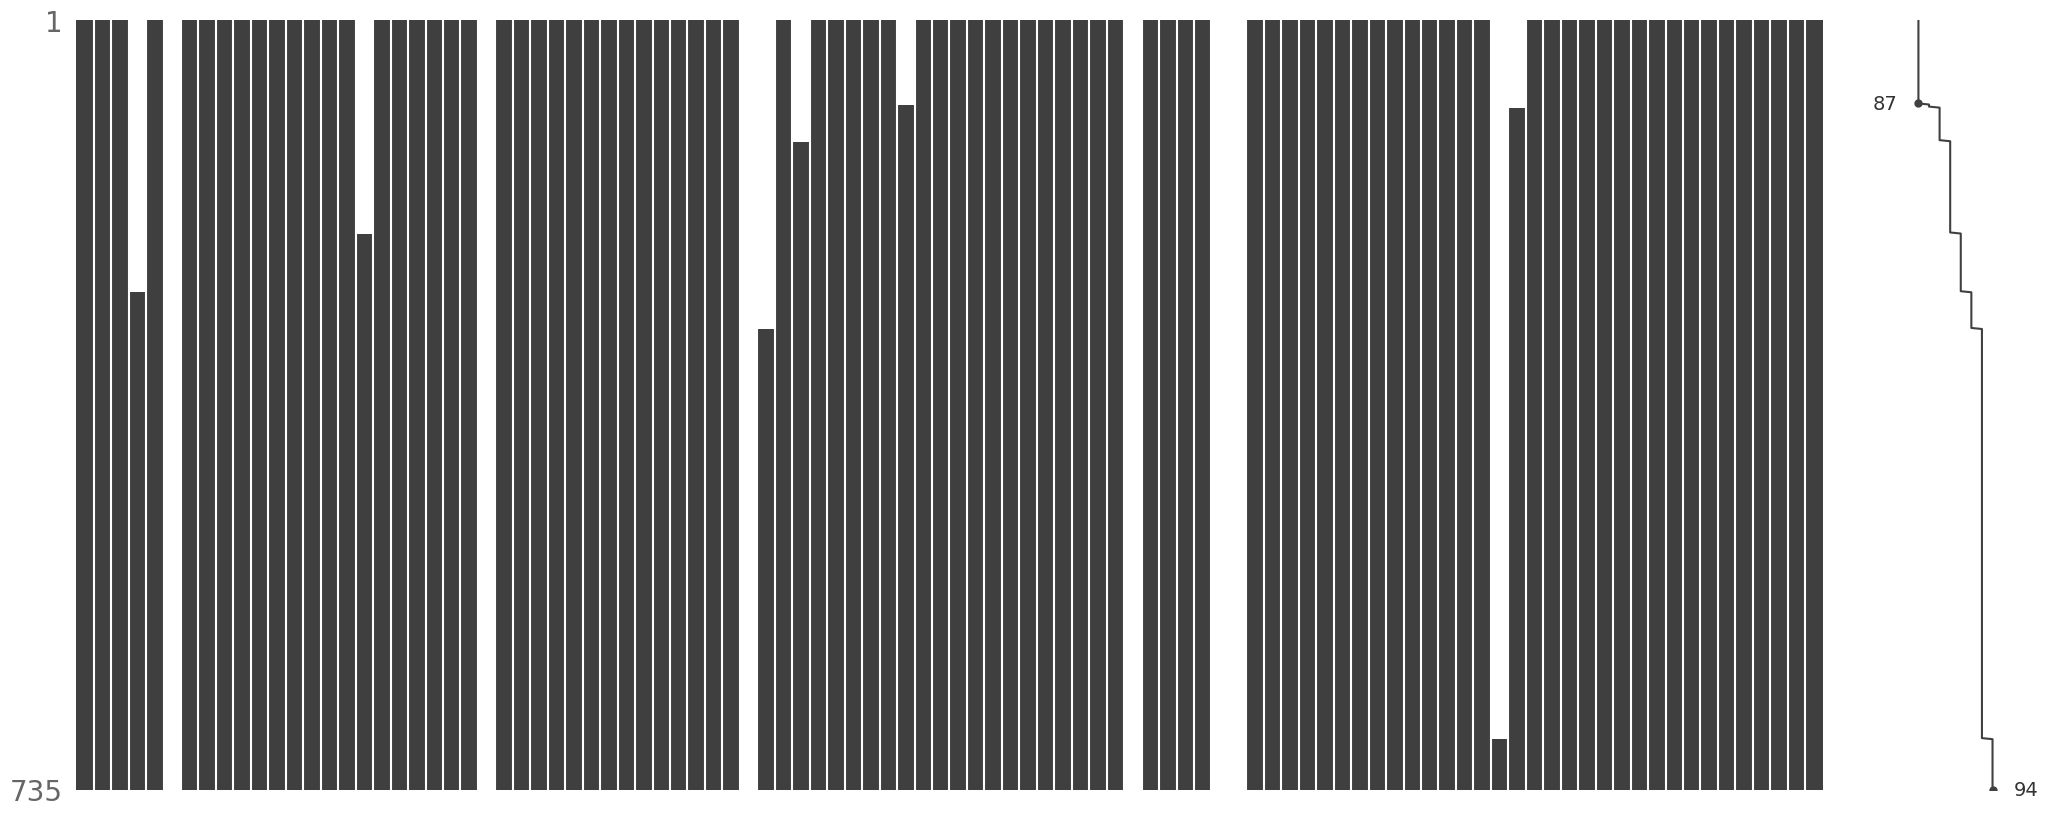

In [48]:
Data = data['Close']
msno.matrix(Data)

In [49]:
def clean_stock_data(data):
    data = data.copy()

    for ticker in data.columns:
        missing_count = data[ticker].isna().sum()

        if missing_count / len(data[ticker]) >= 0.2:
            data = data.drop(columns=[ticker])
        else:
            mean_value = data[ticker].mean()
            data[ticker] = data[ticker].fillna(mean_value)

    return data

Data = clean_stock_data(Data)

Data = Data.ffill().bfill()

# **Pair Selection**

In [50]:
Data.head()

Ticker,ABBOTINDIA.NS,ACC.NS,ADANIENT.NS,ADANIPORTS.NS,ALKEM.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,...,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,UBL.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,3905.268066,1497.655029,62.277576,333.933746,1811.410645,209.197357,1216.719727,1095.305054,553.666870,501.533936,...,1112.942505,317.145142,451.457916,552.241943,787.816528,4066.485107,558.182983,85.275963,97.669357,278.980865
2017-06-02,3886.410156,1484.016235,62.677647,342.253387,1844.449219,209.284409,1227.106934,1098.938965,566.800476,500.303040,...,1117.867554,318.660248,452.464966,553.956299,789.964355,4107.408691,550.672241,84.390923,99.564438,286.155243
2017-06-05,3893.208496,1486.454712,62.677647,345.265717,1828.348633,209.197357,1233.805176,1096.343262,566.370605,505.817627,...,1134.886475,321.172272,529.290466,555.007690,806.951782,4046.919922,556.782654,84.593765,100.268333,294.227631
2017-06-06,3915.232910,1451.499512,68.305298,345.648254,1798.055298,204.584335,1268.462158,1088.414795,558.920227,502.420227,...,1175.004517,325.877197,505.600220,554.847778,792.014465,3993.017822,550.958557,84.593765,101.170753,290.867401
2017-06-07,3913.463867,1456.151489,70.038940,343.400970,1760.875244,205.933426,1269.675537,1096.295898,571.194153,506.359222,...,1139.811401,318.899475,514.280334,552.127686,782.495789,4010.694580,546.948608,85.995064,99.158348,288.472687


In [51]:
def find_correlation(Data, threshold = 0.9):

    correlationMatrix = Data.corr()
    n = correlationMatrix.shape[0]
    result = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation Coefficient'])

    for i in range(n):
        for j in range(i + 1, n):
            correlation = correlationMatrix.iloc[i, j]
            if correlation >= threshold:
                result = pd.concat([result,
                                    pd.DataFrame({'Asset 1': [Data.columns[i]],
                                                  'Asset 2': [Data.columns[j]],
                                                  'Correlation Coefficient': [correlation]})],
                                   ignore_index=True)
    return result

def find_cointegrated_pairs(Data, df, threshold=0.01):

    result = pd.DataFrame(columns=['Asset 1', 'Asset 2', 'Correlation Coefficient','p-value'])

    for i in range(len(df)):

      stock_1 = df.iloc[i,0]
      stock_2 = df.iloc[i,1]
      correlation = df.iloc[i,2]
      p_value = coint(Data[stock_1], Data[stock_2])[1]
      if p_value <= threshold:
        result = pd.concat([result,
                                    pd.DataFrame({'Asset 1': [stock_1],
                                                  'Asset 2': [stock_2],
                                                  'Correlation Coefficient': [correlation],
                                                  'p-value':[p_value]})],
                                   ignore_index=True)
    return result

In [52]:
correlatedPairs = find_correlation(Data)
correlatedPairs

,Asset 1,Asset 2,Correlation Coefficient
0,ABBOTINDIA.NS,BERGEPAINT.NS,0.922023
1,ABBOTINDIA.NS,DIVISLAB.NS,0.914417
2,ABBOTINDIA.NS,DMART.NS,0.931240
3,ABBOTINDIA.NS,HINDUNILVR.NS,0.907704
4,ABBOTINDIA.NS,NESTLEIND.NS,0.968771
5,ABBOTINDIA.NS,TORNTPHARM.NS,0.902181
6,ASIANPAINT.NS,BERGEPAINT.NS,0.957918
7,ASIANPAINT.NS,HINDUNILVR.NS,0.919594
8,ASIANPAINT.NS,NAUKRI.NS,0.914464
9,ASIANPAINT.NS,NESTLEIND.NS,0.942626


In [53]:
cointegratedPairs = find_cointegrated_pairs(Data, correlatedPairs)
cointegratedPairs

,Asset 1,Asset 2,Correlation Coefficient,p-value
0,COALINDIA.NS,ONGC.NS,0.916927,0.007184
1,DMART.NS,NESTLEIND.NS,0.933624,0.007430
2,HDFCLIFE.NS,SBILIFE.NS,0.917625,0.004894
3,HEROMOTOCO.NS,VEDL.NS,0.912076,0.005457
4,HINDUNILVR.NS,PIDILITIND.NS,0.946686,0.004103
5,INFY.NS,TCS.NS,0.961858,0.000107
6,NTPC.NS,ONGC.NS,0.903592,0.000842
7,PGHH.NS,TITAN.NS,0.925814,0.001276


# Hedge Ratio

In [54]:
def calculate_hedge_ratio(df,Data):
    hedge_ratio = []
    n = df.shape[0]
    for i in range(n):
        covariance = np.cov(Data[df.iloc[i, 0]].values, Data[df.iloc[i, 1]].values)[0, 1]
        variance = np.var(Data[df.iloc[i, 1]])
        hedge_ratio.append(covariance/variance)
    return hedge_ratio


In [55]:
cointegratedPairs['Hedge Ratio'] = calculate_hedge_ratio(cointegratedPairs,Data)
cointegratedPairs

,Asset 1,Asset 2,Correlation Coefficient,p-value,Hedge Ratio
0,COALINDIA.NS,ONGC.NS,0.916927,0.007184,0.981055
1,DMART.NS,NESTLEIND.NS,0.933624,0.007430,1.174518
2,HDFCLIFE.NS,SBILIFE.NS,0.917625,0.004894,0.560784
3,HEROMOTOCO.NS,VEDL.NS,0.912076,0.005457,15.510577
4,HINDUNILVR.NS,PIDILITIND.NS,0.946686,0.004103,1.299254
5,INFY.NS,TCS.NS,0.961858,0.000107,0.306251
6,NTPC.NS,ONGC.NS,0.903592,0.000842,0.440465
7,PGHH.NS,TITAN.NS,0.925814,0.001276,4.286380


In [56]:
cointegratedPairs['criterion'] = np.abs(cointegratedPairs['Hedge Ratio'] - 1)
cointegratedPairs.sort_values(by='criterion', inplace=True)
cointegratedPairs

,Asset 1,Asset 2,Correlation Coefficient,p-value,Hedge Ratio,criterion
0,COALINDIA.NS,ONGC.NS,0.916927,0.007184,0.981055,0.018945
1,DMART.NS,NESTLEIND.NS,0.933624,0.007430,1.174518,0.174518
4,HINDUNILVR.NS,PIDILITIND.NS,0.946686,0.004103,1.299254,0.299254
2,HDFCLIFE.NS,SBILIFE.NS,0.917625,0.004894,0.560784,0.439216
6,NTPC.NS,ONGC.NS,0.903592,0.000842,0.440465,0.559535
5,INFY.NS,TCS.NS,0.961858,0.000107,0.306251,0.693749
7,PGHH.NS,TITAN.NS,0.925814,0.001276,4.286380,3.286380
3,HEROMOTOCO.NS,VEDL.NS,0.912076,0.005457,15.510577,14.510577


To select from the remaining pairs we select the pair with Hedge Ratio closest to one.

# Calculating Spread and Z-Score

In [57]:
Stock_1 = cointegratedPairs['Asset 1'][0]
Stock_2 = cointegratedPairs['Asset 2'][0]
Hedge_ratio = cointegratedPairs['Hedge Ratio'][0]

tradingData=yf.download([Stock_1, Stock_2],start='2020-07-01',end='2023-07-01',interval='1d')

[*********************100%***********************]  2 of 2 completed


In [58]:
tradingData = tradingData['Close']

In [59]:
spread = tradingData[Stock_1] - tradingData[Stock_2]*Hedge_ratio

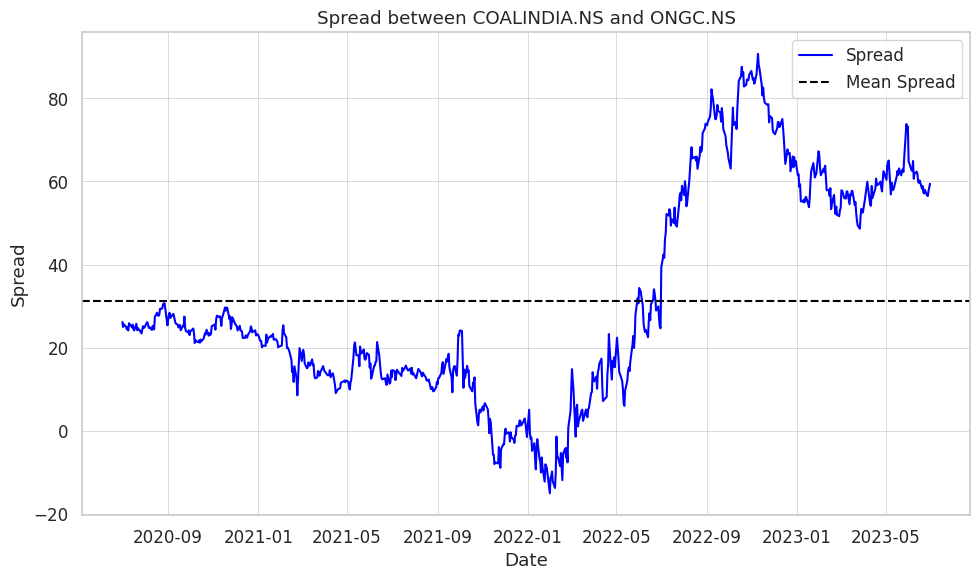

In [60]:
def plot_spread(spread, asset_1, asset_2):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))

    sns.lineplot(x=spread.index, y=spread.values, label='Spread', color='blue')

    plt.axhline(spread.mean(), color='black', linestyle='--', label='Mean Spread')

    plt.title(f"Spread between {asset_1} and {asset_2}")
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_spread(spread, Stock_1, Stock_2)

In [61]:
def zscore(series):
    lookback = 21
    scores = []
    for i in range(lookback, len(series)):
      window = series[i-lookback:i]
      scores.append((series[i]-window.mean())/window.std())
    return pd.Series(scores, index = series.index[lookback:])

In [62]:
zscore = zscore(spread)

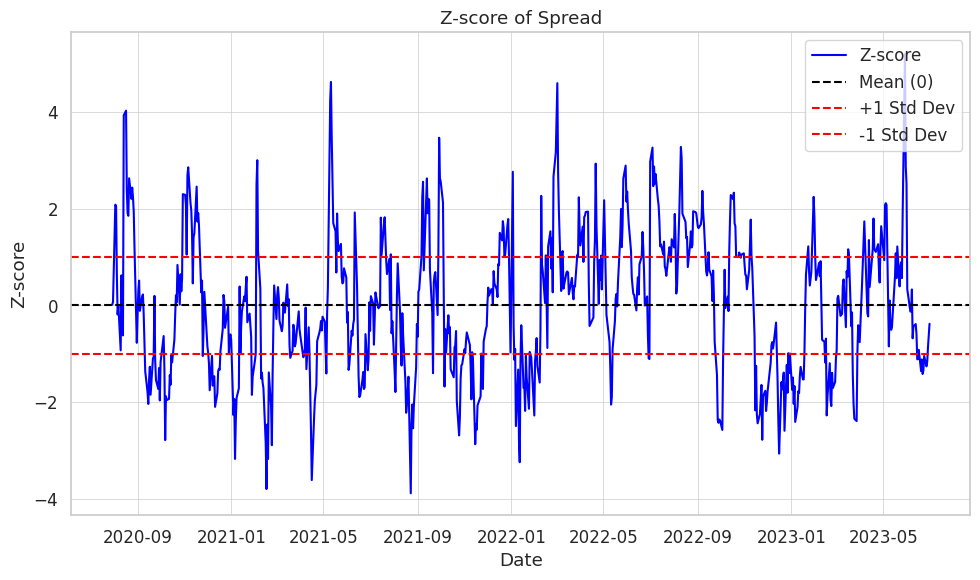

In [63]:
def plot_zscore(zscore):

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))

    sns.lineplot(x=zscore.index, y=zscore, label='Z-score', color='blue')

    plt.axhline(0, color='black', linestyle='--', label='Mean (0)')
    plt.axhline(1, color='red', linestyle='--', label='+1 Std Dev')
    plt.axhline(-1, color='red', linestyle='--', label='-1 Std Dev')

    plt.title(f'Z-score of Spread')
    plt.xlabel('Date')
    plt.ylabel('Z-score')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_zscore(zscore)

In [64]:
tradingData['Spread'] = spread
tradingData['Z-Score'] = zscore

# **Signal Generation**

In [65]:
def generate_signals(tradingData, threshold=1.0):
    tradingData['Signal 1'] = np.select([tradingData['Z-Score'] > threshold, tradingData['Z-Score'] < -1*threshold], [-1, 1], default = 0)
    tradingData['Signal 2'] = np.select([tradingData['Z-Score'] > threshold, tradingData['Z-Score'] < -1*threshold], [1, -1], default = 0)
    tradingData.dropna(inplace=True)
    return tradingData

generate_signals(tradingData)

Ticker,COALINDIA.NS,ONGC.NS,Spread,Z-Score,Signal 1,Signal 2
Date,,,,,,
2020-07-30,82.664177,58.936764,24.843944,0.014546,0,0
2020-07-31,83.082008,59.391884,24.815277,0.071826,0,0
2020-08-03,82.535622,57.571445,26.054842,2.082048,-1,1
2020-08-04,82.760605,57.723152,26.130992,2.051900,-1,1
2020-08-05,82.567757,58.367897,25.305614,0.651241,0,0
...,...,...,...,...,...,...
2023-06-23,197.481216,142.179398,57.995344,-1.046994,1,-1
2023-06-26,196.082504,142.179398,56.596632,-1.261895,1,-1
2023-06-27,196.825577,143.040253,56.495158,-1.163647,1,-1


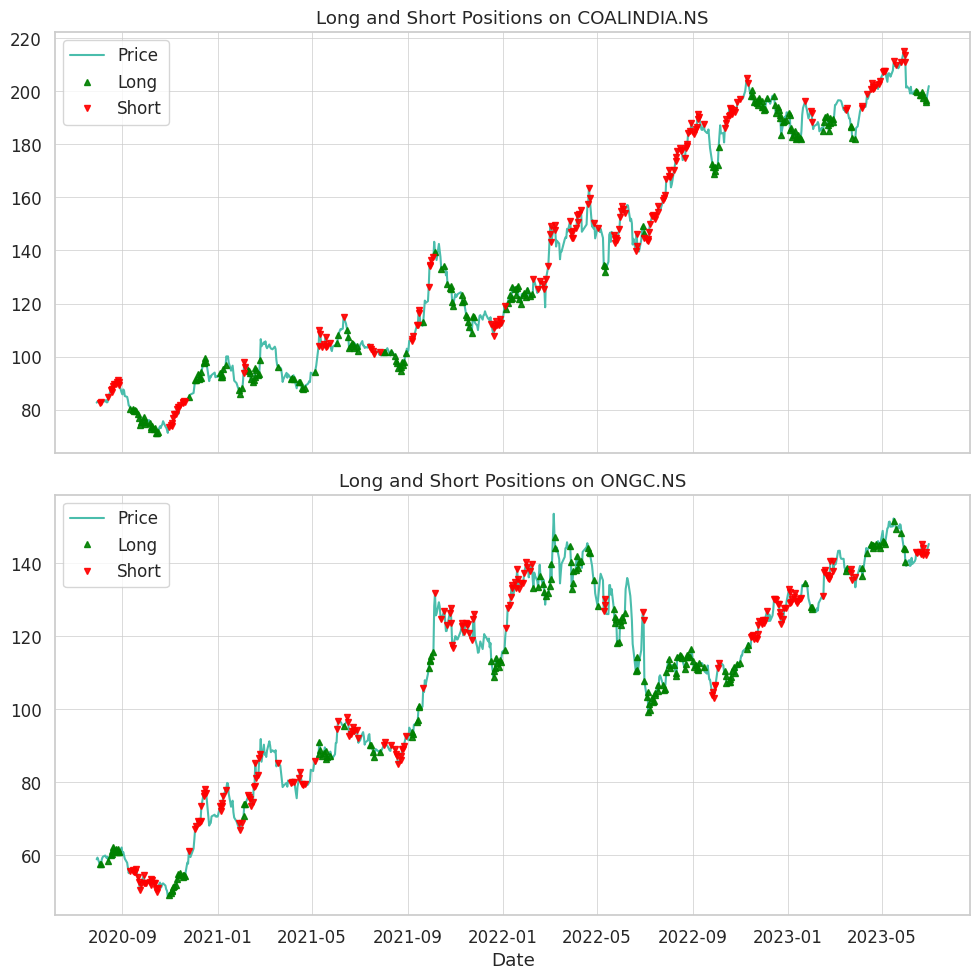

In [66]:
def plot_signals(tradingData):
    stock1 = tradingData.columns[0]
    stock2 = tradingData.columns[1]

    sns.set_style('whitegrid')
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

    # --- Asset 1 ---
    ax1 = axes[0]
    ax1.plot(tradingData[stock1], color='#4abdac', label='Price')

    long_signals_1 = tradingData[tradingData['Signal 1'] == 1]
    short_signals_1 = tradingData[tradingData['Signal 1'] == -1]

    ax1.plot(long_signals_1.index, long_signals_1[stock1], lw=0, marker='^', color='green', markersize=4, alpha=0.9, label='Long')
    ax1.plot(short_signals_1.index, short_signals_1[stock1], lw=0, marker='v', color='red', markersize=4, alpha=0.9, label='Short')

    ax1.set_title(f'Long and Short Positions on {stock1}')
    ax1.legend()

    # --- Asset 2 ---
    ax2 = axes[1]
    ax2.plot(tradingData[stock2], color='#4abdac', label='Price')

    long_signals_2 = tradingData[tradingData['Signal 2'] == 1]
    short_signals_2 = tradingData[tradingData['Signal 2'] == -1]

    ax2.plot(long_signals_2.index, long_signals_2[stock2], lw=0, marker='^', color='green', markersize=4, alpha=0.9, label='Long')
    ax2.plot(short_signals_2.index, short_signals_2[stock2], lw=0, marker='v', color='red', markersize=4, alpha=0.9, label='Short')

    ax2.set_title(f'Long and Short Positions on {stock2}')
    ax2.legend()

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

plot_signals(tradingData)

# **Backtesting**

In [67]:
def backtest_pairs_trading(data, stock1, stock2, initial_capital=100000):
    capital = initial_capital
    w1, w2 = 0.5, 0.5

    position_stock1 = 0
    position_stock2 = 0
    current_signal = 0

    portfolio_values = []

    for index, row in data.iterrows():
        signal = row['Signal 1']

        if signal != current_signal:

            capital += position_stock1 * row[stock1] + position_stock2 * row[stock2]
            position_stock1 = 0
            position_stock2 = 0

            if signal == 1:
                position_stock1 = (capital * w1) // row[stock1]
                position_stock2 = -(capital * w2) // row[stock2]
                capital -= (position_stock1 * row[stock1] + position_stock2 * row[stock2])
            elif signal == -1:
                position_stock1 = -(capital * w1) // row[stock1]
                position_stock2 = (capital * w2) // row[stock2]
                capital -= (position_stock1 * row[stock1] + position_stock2 * row[stock2])

            current_signal = signal

        portfolio_value = capital + position_stock1 * row[stock1] + position_stock2 * row[stock2]
        portfolio_values.append(portfolio_value)

    data['Portfolio_Value'] = portfolio_values
    return data


In [68]:
tradingData = backtest_pairs_trading(tradingData, Stock_1, Stock_2)

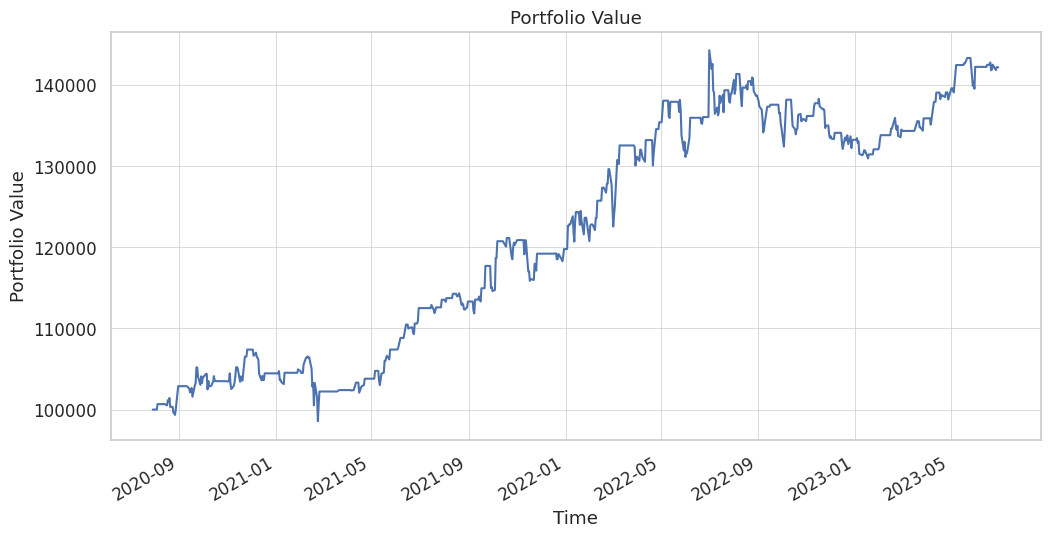

In [69]:
tradingData['Portfolio_Value'].plot(figsize=(12, 6), title='Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.show()

# **Performance** **Metrics**

In [70]:
tradingData

Ticker,COALINDIA.NS,ONGC.NS,Spread,Z-Score,Signal 1,Signal 2,Portfolio_Value
Date,,,,,,,
2020-07-30,82.664177,58.936764,24.843944,0.014546,0,0,100000.000000
2020-07-31,83.082008,59.391884,24.815277,0.071826,0,0,100000.000000
2020-08-03,82.535622,57.571445,26.054842,2.082048,-1,1,100000.000000
2020-08-04,82.760605,57.723152,26.130992,2.051900,-1,1,99995.341583
2020-08-05,82.567757,58.367897,25.305614,0.651241,0,0,100671.846146
...,...,...,...,...,...,...,...
2023-06-23,197.481216,142.179398,57.995344,-1.046994,1,-1,142471.799999
2023-06-26,196.082504,142.179398,56.596632,-1.261895,1,-1,141971.061047
2023-06-27,196.825577,143.040253,56.495158,-1.163647,1,-1,141807.514309


In [72]:
portfolio = tradingData['Portfolio_Value'].copy()
signals   = tradingData['Signal 1'].copy()

# ———————— basic stats ————————
initial_value = portfolio.iloc[0]
final_value   = portfolio.iloc[-1]
trading_days  = len(portfolio)
YEAR_DAYS     = 252

print(f"Number of trading days = {trading_days}")

# CAGR
cagr = ( final_value / initial_value ) ** ( YEAR_DAYS / trading_days ) - 1
print(f"CAGR = {cagr*100:.3f}%")

# Cumulative return
cum_ret = final_value / initial_value - 1
print(f"Cumulative Return = {cum_ret*100:.3f}%")

# ———————— risk metrics via quantstats ————————
max_dd = qs.stats.max_drawdown(portfolio)
print(f"Maximum Drawdown = {max_dd*100:.3f}%")

sharpe = qs.stats.sharpe(portfolio)
print(f"Sharpe Ratio = {sharpe:.3f}")

# ———————— trade frequency ————————
n_trades = abs(signals).diff().fillna(0).astype(bool).sum()
freq_per_year = n_trades / trading_days * YEAR_DAYS

print(f"Frequency of trades = {n_trades} trades total → {freq_per_year:.3f} per year")


Number of trading days = 726
CAGR = 12.984%
Cumulative Return = 42.148%
Maximum Drawdown = -9.229%
Sharpe Ratio = 1.033
Frequency of trades = 180 trades total → 62.479 per year
